In [15]:
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Black-Scholes Option Pricing

In [50]:
def option_bs(s, k, r, t, g):
    """
    s: Spot Price
    k: Strike Price
    r: Risk-free Rate
    t: Time to Maturity
    g: Volatility
    """
    d1 = (np.log(s / k) + (r + (g ** 2) / 2) * t) / (g * np.sqrt(t))
    d2 = d1 - g * np.sqrt(t)

    c = s * norm.cdf(d1) - k * np.exp(-r * t) * norm.cdf(d2)
    p = k * np.exp(-r * t) * norm.cdf(-d2) - s * norm.cdf(-d1)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (s * g * np.sqrt(t))
    theta = -s * norm.pdf(d1) * g / (2 * np.sqrt(t)) - r * k * np.exp(-r * t) * norm.cdf(d2)
    vega = s * np.sqrt(t) * norm.pdf(d1)
    rho = k * t * np.exp(-r * t) * norm.cdf(d2)
    
    return c, p, delta, gamma, theta, vega, rho

In [51]:
def plot_3d(s_range, k, r, t, g_range, callput):

    S_grid, sigma_grid = np.meshgrid(s_range, g_range)
    call_prices, put_price, _, _, _, _, _ = option_bs(S_grid, k, r, t, sigma_grid)

    fig = plt.figure(figsize = (8, 16))
    ax = fig.add_subplot(111, projection = '3d')
    if callput == 'put':
        ax.plot_surface(S_grid, sigma_grid, put_price, cmap = 'jet', edgecolor = 'k')
    if callput == 'call':
        ax.plot_surface(S_grid, sigma_grid, call_prices, cmap = 'jet', edgecolor = 'k')

    ax.set_xlabel("Stock Price (S)")
    ax.set_ylabel("Volatility (σ)")
    ax.set_zlabel("Call Option Price (C)")
    ax.set_title("3D Black-Scholes Call Option Pricing")

    plt.show()

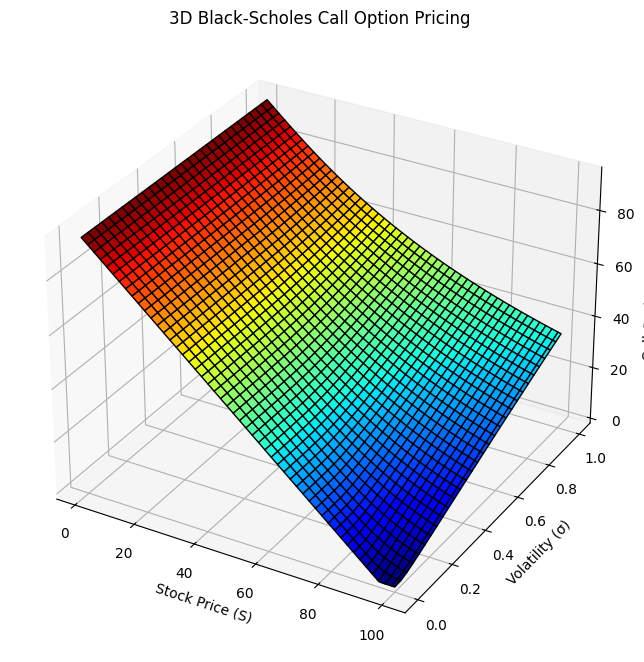

In [52]:
s_range = np.linspace(1, 100, 100)
k = 100
r = 0.05
t = 1
sigma_range = np.linspace(0.0001, 1, 30)
callput = "put"

plot_3d(s_range, k, r, t, sigma_range, callput)

### Plot Greek

In [69]:
def plot_bs_greek(s_range, k, r, t_range, sigma, callput, greek):
    """
    callput: 'call' or 'put'
    greek: Greek to plot ('delta', 'gamma', 'theta', 'vega', 'rho')
    """
    S_grid, T_grid = np.meshgrid(s_range, t_range)

    _, _, delta_call, gamma_call, theta_call, vega_call, rho_call = option_bs(S_grid, k, r, T_grid, sigma)
    _, _, delta_put, gamma_put, theta_put, vega_put, rho_put = option_bs(S_grid, k, r, T_grid, sigma)

    if greek == 'delta':
        values = delta_call if callput == 'call' else delta_put
    elif greek == 'gamma':
        values = gamma_call  # Gamma is the same for call and put
    elif greek == 'theta':
        values = theta_call if callput == 'call' else theta_put
    elif greek == 'vega':
        values = vega_call  # Vega is the same for call and put
    elif greek == 'rho':
        values = rho_call if callput == 'call' else rho_put
    else:
        raise ValueError("Invalid Greek. Choose from 'delta', 'gamma', 'theta', 'vega', 'rho'.")

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(S_grid, T_grid, values, cmap='jet', edgecolor='k')
    ax.view_init(elev=30, azim=240)

    ax.set_xlabel("Stock Price (S)")
    ax.set_ylabel("Maturity Time (T)")
    ax.set_zlabel(f"{callput.capitalize()} {greek.capitalize()}")
    ax.set_title(f"Black-Scholes {callput.capitalize()} Option {greek.capitalize()}")

    plt.show()

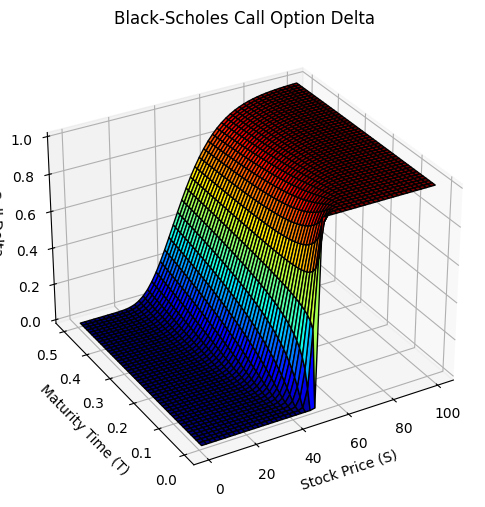

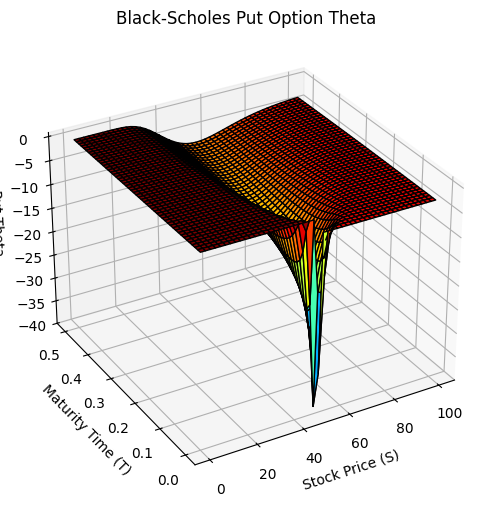

In [72]:
s = np.linspace(1, 100, 50)
k = 50
r = 0.06
t = np.linspace(0.0001, 0.5, 50)
sigma = 0.4

plot_bs_greek(s, k, r, t, sigma, 'call', "delta")
plot_bs_greek(s, k, r, t, sigma, 'put', "theta")

In [75]:
c, p, _, _, _, _, _ = option_bs(27, 28, 0.027, 2, 0.25)
print(c, p)

3.996001057404454 3.5241000394548063


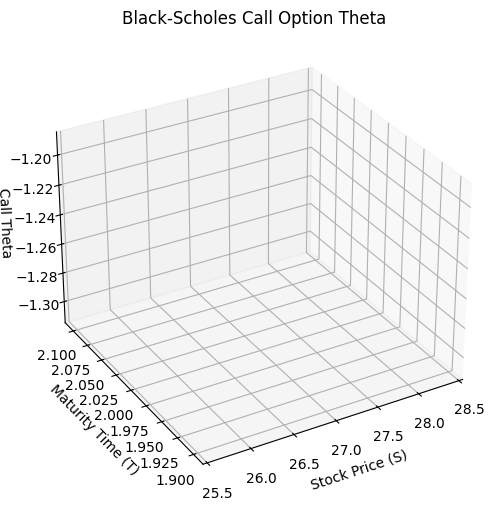

In [76]:
plot_bs_greek(27, 28, 0.027, 2, 0.25, "call", "theta")